<a href="https://colab.research.google.com/github/brancatellimat/speech-emotion-recognition/blob/main/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform SVM

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tqdm import tqdm

import os
import sys
import math

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import librosa.feature as libf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, minmax_scale, scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

from scipy.stats import kurtosis
from scipy.stats import skew

eps = sys.float_info.epsilon

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Read features csv

In [2]:
features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio Pattern Recognition/Project_Brancatelli/features.csv')
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.085938,0.133301,0.183105,0.187500,0.178223,0.188477,0.190918,0.193359,0.208984,0.205566,...,-14.089257,-25.075800,-3.903448,15.829265,12.395281,2.053978,1.491210,8.443647,0.892359,angry
1,0.255371,0.383301,0.500000,0.506836,0.498047,0.503418,0.514160,0.502930,0.494141,0.494629,...,-11.405813,-19.741389,-0.651677,13.968719,17.333213,6.716258,-1.127772,6.467607,3.954587,angry
2,0.083984,0.122559,0.160645,0.161621,0.162598,0.173828,0.180664,0.181152,0.188477,0.185059,...,-19.742268,-26.791355,6.480295,19.145300,8.132185,0.755440,2.556036,4.647817,-9.670603,angry
3,0.248047,0.372070,0.496582,0.504883,0.501953,0.499023,0.501953,0.492188,0.480469,0.478027,...,-17.215576,-24.751422,7.099199,17.933453,8.685198,-0.208873,4.539900,5.697086,-9.502117,angry
4,0.322754,0.488770,0.630859,0.569824,0.644531,0.702148,0.739746,0.739258,0.691406,0.623047,...,7.107078,1.137663,-10.316067,-4.229964,-0.267964,-6.191520,-8.788673,-1.441431,7.607452,disgust


In [3]:
X = features.iloc[:, :-1]
Y = features['Emotions']


In [4]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(X)
scaled_both = pd.DataFrame(scaled_dataset)
scaled_both['Emotions'] = Y
scaled_both.head()

scaled_both = scaled_both.fillna(0)

X = scaled_both.iloc[:, :-1].values
Y = scaled_both['Emotions'].values
#both.head()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27193, 2376), (27193,), (6799, 2376), (6799,))

In [6]:
print('Number of rows in train:', x_train.shape[0])
print('Number of rows in test:', x_test.shape[0])

Number of rows in train: 27193
Number of rows in test: 6799


In [7]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.


In [ ]:
def SVM_Classifier(x_train, y_train, x_test, y_test):

  with tf.device(device_name=device_name):
    print('SVM Classifier - Starting....')
    dfs = 'ovo' # One-vs-One
    reg_parameters = [50,500]
    kernels = ['poly', 'rbf']
    best_accuracy_svm = 0
    best_C = 0
    best_kernel = ''
    best_pred = pd.DataFrame()

    for parameter in tqdm(reg_parameters):
      for kernel in tqdm(kernels):
        model_svc = SVC(decision_function_shape=dfs, C=parameter, kernel=kernel)
        model_svc.fit(x_train, y_train)
        y_pred = model_svc.predict(x_test)
        prediction_accuracy = round(accuracy_score(y_test, y_pred), 4)

        # Update current best model parameters if pred. accuracy is better
        if best_accuracy_svm < prediction_accuracy:
          best_accuracy_svm = prediction_accuracy
          best_C = parameter
          best_kernel = kernel
          best_pred = y_pred

        print('Accuracy obtained for Regualarization Parameter: ', parameter, ' - Kernel: ', kernel, ' is: ', prediction_accuracy)

    print('Best accuracy of Support Vector Machine:',best_accuracy_svm,'for regularization parameter C:',best_C, 'and kernel:',best_kernel)

  return y_pred

In [ ]:
y_pred = SVM_Classifier(x_train, y_train, x_test, y_test)

SVM Classifier - Starting....


 50%|█████     | 1/2 [24:03<24:03, 1443.48s/it]

Accuracy obtained for Regualarization Parameter:  50  - Kernel:  poly  is:  0.8347



 50%|█████     | 1/2 [57:47<57:47, 3467.02s/it]

Accuracy obtained for Regualarization Parameter:  50  - Kernel:  rbf  is:  0.892



 50%|█████     | 1/2 [24:25<24:25, 1465.39s/it]

Accuracy obtained for Regualarization Parameter:  500  - Kernel:  poly  is:  0.8881


Runtime disconnected! Run SVC with the missing parameters combination (ovo, 500, rbf)

In [8]:
model_svc = SVC(decision_function_shape='ovo', C=500, kernel='rbf')
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_test)

In [9]:
accuracy_score(y_test,y_pred)

0.8930725106633328

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.90      0.94      0.92      1153
     disgust       0.88      0.90      0.89      1189
        fear       0.88      0.86      0.87      1111
       happy       0.88      0.89      0.89      1162
     neutral       0.92      0.86      0.89       975
         sad       0.90      0.89      0.90      1209

    accuracy                           0.89      6799
   macro avg       0.89      0.89      0.89      6799
weighted avg       0.89      0.89      0.89      6799



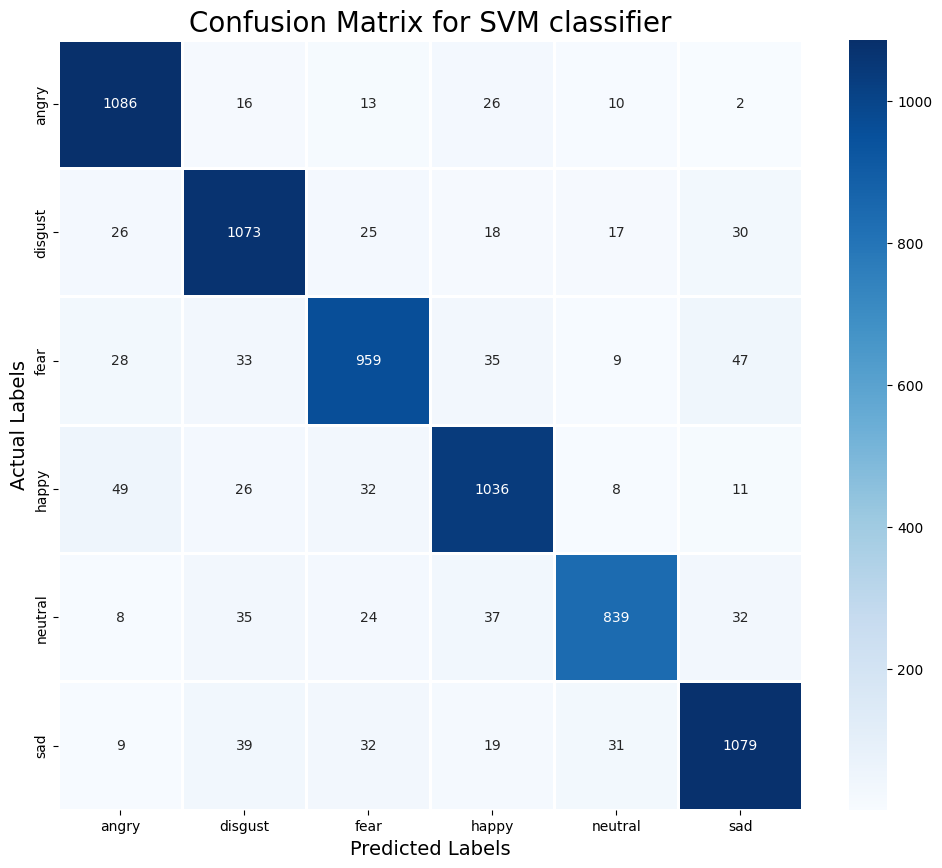

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in np.unique(y_test)] , columns = [i for i in np.unique(y_test)])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for SVM classifier', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()